<a href="https://colab.research.google.com/github/zjuiEMLab/rshub/blob/main/demo/Soil-demo-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Active Soil demo

In [2]:
import datetime
import copy
!pip install rshub -q

In [1]:
# Define user token
token = 'ENTER YOUR TOKEN HERE' # Register an account to get a token
# Chang your task name or project name every time you run a new job
project_name = 'Soil'
task_name1 = 'Roughness1'

### Step 1: Define Scenario flag

In [3]:
# ============== CHANGE YOUR INPUT PARAMETERS HERE ==============
# ====== Parameters not define will be set to default values ======

# 1: Bare soil
# 2: Snow
# 3: Vegetation covered soil
scenario_flag = 1

### Step 2: Define observation description

In [4]:
# 1) Observation mode
# 1: Active (Backscatter)
# 2: Passive (Brightness temperature)
output_var = 1 # for soil model, both active and passive results will be outputed; Use this flag to retrieve results

# 2) Observation characteristics
fGHz = 1.26

# 3) Observation angle
angle = 40

### Step 3: Define Algorithm flag

In [5]:
# 1: VIE NMM3D
algorithm = 1

### Step 4: Describe your scenario

In [6]:
# rough surface geometry parameters
h = 0.00168 # RMS height of the soil roughness [m]

# physical temperatures
#Ts = 300.75 # top soillayer temperature [K]
#Tg = 295.15 # ground temperature [K]

# dielectric constants
#epsr_ice_re = 4.024 # Real part of top layer medium permittivity
#epsr_ice_im = 0.3 # Imaginary part of top layer medium permittivity
epsr_g_re = 8.35 # Real part of Substrate layer medium permittivity
epsr_g_im = 1.99 # Imaginary part of Substrate layer medium permittivity

In [7]:
data = {
    'scenario_flag': scenario_flag,
    'output_var': output_var,'fGHz': fGHz,
    'algorithm':algorithm,
    'angle': angle,
    #'h': h,'Ts':Ts,'Tg':Tg,
    #'epsr_ice_re':epsr_ice_re,'epsr_ice_im':epsr_ice_im,
    'epsr_g_re':epsr_g_re,'epsr_g_im':epsr_g_im,
    'project_name':project_name,
    'task_name':task_name1,
    'token': token,
    'level_required':1
}

## Run models

In [9]:
from rshub import submit_jobs
result=submit_jobs.run(data)

{"scenario_flag": 1, "output_var": 1, "fGHz": 1.26, "algorithm": 1, "angle": 40, "epsr_g_re": 8.35, "epsr_g_im": 1.99, "project_name": "Soil", "task_name": "Roughness1", "level_required": 1}


In [10]:
print(result['result'])

Job submitted!


In [ ]:
# Store log information
now = datetime.datetime.now()
logname = 'log_' + now.strftime("%Y%m%d%H%M%D") + '.txt'
f = open('log.txt',"a")
head_string = '======' + now.strftime("%Y%m%d%H%M%D") + '======' + "\n"
f.write(head_string)
f.write(f' project_name = {project_name} \n')
f.write(f' task_name = {task_name1} \n')
f.write(f' data = {data} \n')
f.write('================================ \n')
f.close()

# Check Job Status (It will take over half an hour!)

In [ ]:
from rshub import submit_jobs
result=submit_jobs.check_completion(token, project_name, task_name1)
print(result)

Jobs are completed


In [ ]:
from rshub.load_file import load_file

data = load_file(token, project_name, task_name1 , fGHz)
message = data.load_error_message()

message: Jobs completed succesfully



# Post Process

In [ ]:
from rshub.load_file import load_file

## Active

In [ ]:
# load mat file with project id, frequencies,variables to load
output_var = 1
data = load_file(token, project_name, task_name1 , fGHz, scenario_flag,output_var, angle)

data_active = data.load_outputs()

In [ ]:
import numpy as np
# Information of the stored variables
info = data_active['info_json'][0]
print(info)

{"backscatter":"Backscatter at polar angle 180 degree and incident angle 40 in order of VV, HV, VH, HH","thetas":"Azimuth angles","phis":"Polar angles","g_coh":"Coherent bistatic scattering coefficient in dB","g_inc":"Incoherent bistatic scattering coefficient in dB","g_tot":"Total bistatic scattering coefficient in dB"}


In [ ]:
# Backscatter in order of VV, HV, VH, HH
BS = data_active['backscatter']
print(f'Backscatter at 180 degree and incident angle {angle}')
print(f"VV:{BS[0][0]} dB, HV:{BS[0][1]} dB, VH:{BS[0][2]} dB, HH:{BS[0][3]} dB")

Backscatter at 180 degree and incident angle 40
VV:-16.648157661991277, HV:-37.079865117530034, VH:-37.080390503369756, HH:-19.996973232557117


In [ ]:
phis = data_active['phis'] # polar angles
bis =  data_active['g_tot'] # total bistatic coefficient
thetas = data_active['thetas'] # azimuth angle
f180deg = np.where(phis == 180)[0]
f0deg = np.where(phis == 0)[0]

In [ ]:
# Combine arrays with reversed first part
bis_180_0_VV = np.vstack((bis[::-1, f180deg, 0], bis[:, f0deg, 0]))
bis_180_0_HV = np.vstack((bis[::-1, f180deg, 1], bis[:, f0deg, 1]))
bis_180_0_VH = np.vstack((bis[::-1, f180deg, 2], bis[:, f0deg, 2]))
bis_180_0_HH = np.vstack((bis[::-1, f180deg, 3], bis[:, f0deg, 3]))
bis_180_0_VV=bis_180_0_VV.flatten()
bis_180_0_HV=bis_180_0_HV.flatten()
bis_180_0_VH=bis_180_0_VH.flatten()
bis_180_0_HH=bis_180_0_HH.flatten()

In [ ]:
# combine thetas
thetas_merge = np.vstack((-thetas[::-1], thetas))
thetas_merge=thetas_merge.flatten()

In [ ]:
valid_indices = ~np.isnan(bis_180_0_VV)

(array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

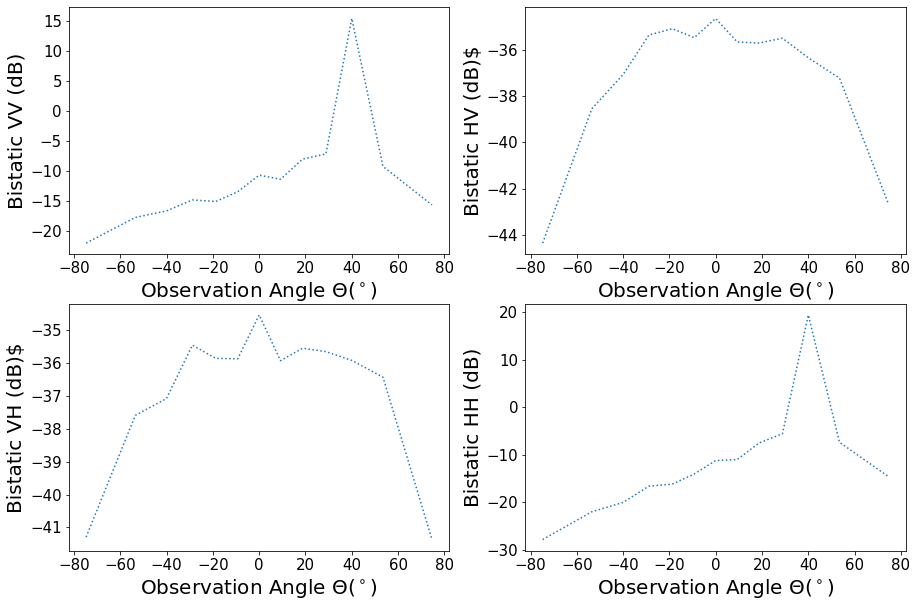

In [ ]:
import matplotlib.pyplot as plt

# plot the data
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(2, 2, 1)
ax.plot(thetas_merge[valid_indices], bis_180_0_VV[valid_indices], color='tab:blue',linestyle='dotted')
ax.set_xlabel('Observation Angle $\Theta(^\circ)$', fontsize = 20)
ax.set_ylabel('Bistatic VV (dB)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax = fig.add_subplot(2, 2, 2)
ax.plot(thetas_merge[valid_indices], bis_180_0_HV[valid_indices], color='tab:blue',linestyle='dotted')
ax.set_xlabel('Observation Angle $\Theta(^\circ)$', fontsize = 20)
ax.set_ylabel('Bistatic HV (dB)$', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax = fig.add_subplot(2, 2, 3)
ax.plot(thetas_merge[valid_indices], bis_180_0_VH[valid_indices], color='tab:blue',linestyle='dotted')
ax.set_xlabel('Observation Angle $\Theta(^\circ)$', fontsize = 20)
ax.set_ylabel('Bistatic VH (dB)$', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

ax = fig.add_subplot(2, 2, 4)
ax.plot(thetas_merge[valid_indices], bis_180_0_HH[valid_indices], color='tab:blue',linestyle='dotted')
ax.set_xlabel('Observation Angle $\Theta(^\circ)$', fontsize = 20)
ax.set_ylabel('Bistatic HH (dB)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

## Passive

In [ ]:
# load mat file with project id, frequencies,variables to load
output_var = 2
data = load_file(token, project_name, task_name1 , fGHz, scenario_flag,output_var, angle)

data_passive = data.load_outputs()

In [ ]:
info = data_passive['info_json'][0]
print(info)

{"Tb":"Brightness temperature in K at fGHz1.26_ob_angle40"}


In [ ]:
Tb = data_passive['Tb'] #V, H
print(f'Brightness temperature at incident angle {angle}')
print(f"V:{Tb[0][0]} K, H:{Tb[1][0]} K")

Brightness temperature at incident angle 40
V:263.39753333333334 K, H:221.24112666666664 K
